In [4]:
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
target_users = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")

tweets = 100

media_sentiments = pd.DataFrame()

for news_outlets in target_users:
    media_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    date_created = []


    public_tweets = api.user_timeline(news_outlets, count = tweets)


    i = 0
    for tweet in public_tweets:
        #print(tweet)

        public_tweets = tweet["text"]

        positive_list.append(analyzer.polarity_scores(public_tweets)["pos"])
        negative_list.append(analyzer.polarity_scores(public_tweets)["neg"])
        compound_list.append(analyzer.polarity_scores(public_tweets)["compound"])
        neutral_list.append(analyzer.polarity_scores(public_tweets)["neu"])
        date_created.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
        media_list.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i = i - 1
    
    media_data = pd.DataFrame({"media_list" : media_list,
                              "positive" : positive_list,
                              "negative" : negative_list,
                              "compound": compound_list,
                              "date_created" : date_created,
                              "tweets_ago": tweets_ago })
    
    media_sentiments = media_sentiments.append(media_data)    
    
media_sentiments.set_index('media_list', 'date_created')
media_sentiments.to_csv("Media_Sentiments.csv")


,media_list,positive,negative,compound,date_created,tweets_ago
0,BBC,0.000,0.000,0.0000,2018-09-08 16:05:02+00:00,0
1,BBC,0.000,0.297,-0.5859,2018-09-08 15:06:04+00:00,-1
2,BBC,0.000,0.000,0.0000,2018-09-08 13:08:05+00:00,-2
3,BBC,0.406,0.000,0.6240,2018-09-08 12:13:04+00:00,-3
4,BBC,0.209,0.078,0.4497,2018-09-08 11:05:02+00:00,-4


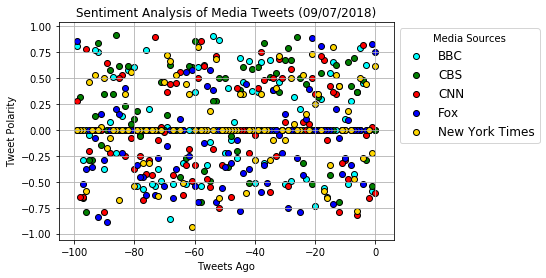

In [13]:
tweets_ago = media_sentiments.loc[media_sentiments.media_list == 'BBC']['tweets_ago']
bbc = media_sentiments.loc[media_sentiments.media_list == "BBC"]["compound"]
plt.scatter(tweets_ago, bbc, marker = "o", facecolors = "cyan", edgecolors = "black", alpha = 1, label = "BBC")

tweets_ago = media_sentiments.loc[media_sentiments.media_list == 'CBS']['tweets_ago']
cbs = media_sentiments.loc[media_sentiments.media_list == "CBS"]["compound"]
plt.scatter(tweets_ago, cbs, marker = "o", facecolors = "green", edgecolors = "black", alpha = 1, label = "CBS")

tweets_ago = media_sentiments.loc[media_sentiments.media_list == 'CNN']['tweets_ago']
cnn = media_sentiments.loc[media_sentiments.media_list == "CNN"]["compound"]
plt.scatter(tweets_ago, cnn, marker = "o", facecolors = "red", edgecolors = "black", alpha = 1, label = "CNN")

tweets_ago = media_sentiments.loc[media_sentiments.media_list == 'FoxNews']['tweets_ago']
fox = media_sentiments.loc[media_sentiments.media_list == "FoxNews"]["compound"]
plt.scatter(tweets_ago, fox, marker = "o", facecolors = "blue", edgecolors = "black", alpha = 1, label = "Fox")

tweets_ago = media_sentiments.loc[media_sentiments.media_list == 'nytimes']['tweets_ago']
ny = media_sentiments.loc[media_sentiments.media_list == "nytimes"]["compound"]
plt.scatter(tweets_ago, ny, marker = "o", facecolors = "gold", edgecolors = "black", alpha = 1, 
            label = "New York Times")

plt.title("Sentiment Analysis of Media Tweets (09/07/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize="large", title="Media Sources")
plt.grid()
plt.savefig("Sentiments.png")
plt.show()

In [4]:
overall_media = []
for news_outlets in target_users:
    print(news_outlets)
    tweet_compound = media_sentiments.loc[media_sentiments.media_list == news_outlets]['compound']
    overall_media.append(np.mean(tweet_compound))
print(overall_media)

BBC
CBS
CNN
FoxNews
nytimes
[0.048255000000000006, 0.143379, -0.027671000000000005, -0.0013610000000000028, -0.0031319999999999994]


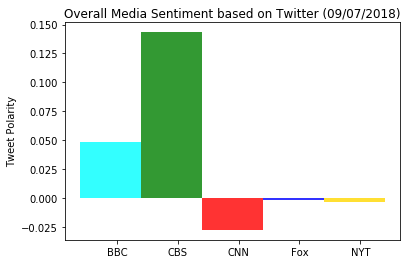

In [5]:
media_users = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]
x_axis = np.arange(len(media_users))
plt.bar(0, overall_media[0], facecolor = "cyan", alpha = 0.8, align = "center", width = 1.0)
plt.bar(1, overall_media[1], facecolor = "green", alpha = 0.8, align = "center", width = 1.0)
plt.bar(2, overall_media[2], facecolor = "red", alpha = 0.8, align = "center", width = 1.0)
plt.bar(3, overall_media[3], facecolor = "blue", alpha = 0.8, align = "center", width = 1.0)
plt.bar(4, overall_media[4], facecolor = "gold", alpha = 0.8, align = "center", width = 1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.title("Overall Media Sentiment based on Twitter (09/07/2018)")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_Sentiments.png")
